In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import utils
from tqdm import tqdm

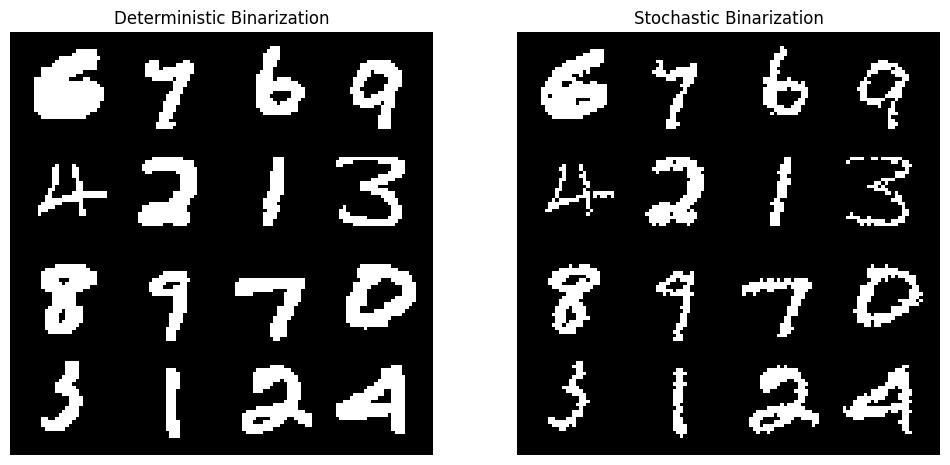

In [4]:
# visualize data
det_dataset = torch.load("datasets/deterministic_dataset.pt")
train_data_det = det_dataset['train_data']

stoch_dataset = torch.load("datasets/stochastic_dataset.pt")
train_data_stoch = stoch_dataset['train_data']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes[0]
samples = train_data_det[:16]
grid_img = utils.make_grid(samples.view(-1, 1, 28, 28), nrow=4)
ax.imshow(grid_img.permute(1, 2, 0).numpy())
ax.set_title("Deterministic Binarization")
ax.axis('off')

ax = axes[1]
samples = train_data_stoch[:16]
grid_img = utils.make_grid(samples.view(-1, 1, 28, 28), nrow=4)
ax.imshow(grid_img.permute(1, 2, 0).numpy())
ax.set_title("Stochastic Binarization")
ax.axis('off')

plt.show()

### Plotting

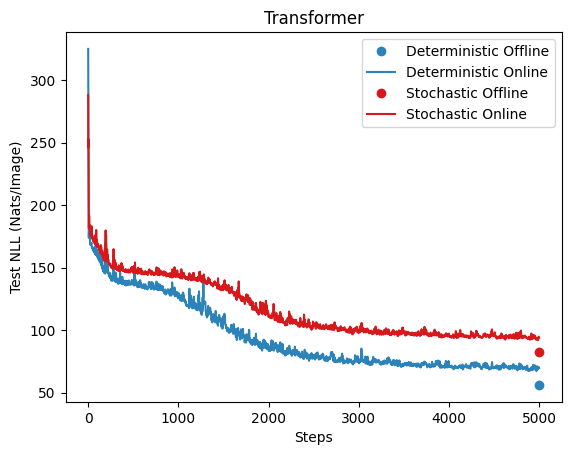

In [6]:
fig, ax = plt.subplots()

# -----------------------------------------------------------------------------
# Transformer
# -----------------------------------------------------------------------------

# deterministic
results = np.load("results/deterministic_online_transformer_results.npy", allow_pickle=True).item()
online_nats_list = results['nats_list']
results = np.load("results/deterministic_batched_transformer_results.npy", allow_pickle=True).item()
offline_nats = results['nats_list'][-1]

color = '#2b83ba'
ax.plot(5000, offline_nats, 'o', label='Deterministic Offline', color=color)
ax.plot(np.arange(len(online_nats_list)), online_nats_list, label='Deterministic Online', color=color)

# stochastic
results = np.load("results/stochastic_online_transformer_results.npy", allow_pickle=True).item()
online_nats_list = results['nats_list']
results = np.load("results/stochastic_batched_transformer_results.npy", allow_pickle=True).item()
offline_nats = results['nats_list'][-1]

color = '#d7191c'
ax.plot(5000, offline_nats, 'o', label='Stochastic Offline', color=color)
ax.plot(np.arange(len(online_nats_list)), online_nats_list, label='Stochastic Online', color=color)

ax.set_xlabel('Steps')
ax.set_ylabel('Test NLL (Nats/Image)')
ax.set_title('Transformer')
ax.legend()
plt.show()